## Insurance Claim Prediction Project

##### **Objective :** To develop a predictive model that accurately forecasts whether a customer will file an insurance claim, leveraging the provided dataset: insurance_data.csv.

In [ ]:
filename = "insurance_data.csv"
target_variable_name = "claim"

# Load Data

In [2]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
data = spark.read.csv(filename, header=True, inferSchema=True, sep=',')
data.show()

+-----+---------+----+------+----+-------------+--------+--------+------+---------+-------+
|index|PatientID| age|gender| bmi|bloodpressure|diabetic|children|smoker|   region|  claim|
+-----+---------+----+------+----+-------------+--------+--------+------+---------+-------+
|    0|        1|39.0|  male|23.2|           91|     Yes|       0|    No|southeast|1121.87|
|    1|        2|24.0|  male|30.1|           87|      No|       0|    No|southeast|1131.51|
|    2|        3|NULL|  male|33.3|           82|     Yes|       0|    No|southeast|1135.94|
|    3|        4|NULL|  male|33.7|           80|      No|       0|    No|northwest| 1136.4|
|    4|        5|NULL|  male|34.1|          100|      No|       0|    No|northwest|1137.01|
|    5|        6|NULL|  male|34.4|           96|     Yes|       0|    No|northwest|1137.47|
|    6|        7|NULL|  male|37.3|           86|     Yes|       0|    No|northwest|1141.45|
|    7|        8|19.0|  male|41.1|          100|      No|       0|    No|northwe

In [4]:
data.show(5)

+-----+---------+----+------+----+-------------+--------+--------+------+---------+-------+
|index|PatientID| age|gender| bmi|bloodpressure|diabetic|children|smoker|   region|  claim|
+-----+---------+----+------+----+-------------+--------+--------+------+---------+-------+
|    0|        1|39.0|  male|23.2|           91|     Yes|       0|    No|southeast|1121.87|
|    1|        2|24.0|  male|30.1|           87|      No|       0|    No|southeast|1131.51|
|    2|        3|NULL|  male|33.3|           82|     Yes|       0|    No|southeast|1135.94|
|    3|        4|NULL|  male|33.7|           80|      No|       0|    No|northwest| 1136.4|
|    4|        5|NULL|  male|34.1|          100|      No|       0|    No|northwest|1137.01|
+-----+---------+----+------+----+-------------+--------+--------+------+---------+-------+
only showing top 5 rows



# Describe Data

In [5]:
data.printSchema()

root
 |-- index: integer (nullable = true)
 |-- PatientID: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- gender: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- bloodpressure: integer (nullable = true)
 |-- diabetic: string (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- claim: double (nullable = true)



In [6]:
data.describe()

DataFrame[summary: string, index: string, PatientID: string, age: string, gender: string, bmi: string, bloodpressure: string, diabetic: string, children: string, smoker: string, region: string, claim: string]

In [7]:
data.describe().toPandas()

,summary,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,count,1340,1340,1335,1340,1340,1340,1340,1340,1340,1337,1340
1,mean,669.5,670.5,38.07865168539326,None,30.668955223880587,94.15746268656716,None,1.0932835820895523,None,None,13252.745641791036
2,stddev,386.9689910057394,386.9689910057394,11.102923881591517,None,6.1067347668419885,11.434711751516943,None,1.2053340350710573,None,None,12109.609287914209
3,min,0,1,18.0,female,16.0,80,No,0,No,northeast,1121.87
4,max,1339,1340,60.0,male,53.1,140,Yes,5,Yes,southwest,63770.43


In [8]:
data.count()

1340

In [9]:
data.groupby('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|female|  662|
|  male|  678|
+------+-----+



In [10]:
data.groupby('smoker').count().show()

+------+-----+
|smoker|count|
+------+-----+
|    No| 1066|
|   Yes|  274|
+------+-----+



In [11]:
data.groupby('region').count().show()

+---------+-----+
|   region|count|
+---------+-----+
|northwest|  349|
|southeast|  443|
|northeast|  231|
|     NULL|    3|
|southwest|  314|
+---------+-----+



In [12]:
data.groupby('diabetic').count().show()

+--------+-----+
|diabetic|count|
+--------+-----+
|      No|  698|
|     Yes|  642|
+--------+-----+



In [13]:
from pyspark.sql.functions import * 
data.groupBy('gender').agg({'claim':'avg'}).show()

+------+------------------+
|gender|        avg(claim)|
+------+------------------+
|female|12569.578897280968|
|  male|13919.790457227138|
+------+------------------+



In [14]:
data.groupBy('diabetic').agg({'claim':'avg'}).show()

+--------+------------------+
|diabetic|        avg(claim)|
+--------+------------------+
|      No|13354.031991404012|
|     Yes|13142.624345794393|
+--------+------------------+



In [15]:
data.groupBy('smoker').agg({'claim':'avg'}).show()

+------+------------------+
|smoker|        avg(claim)|
+------+------------------+
|    No|  8421.12157598499|
|   Yes|32050.231970802903|
+------+------------------+



In [16]:
data.groupBy('region').agg({'claim':'avg'}).show()

+---------+------------------+
|   region|        avg(claim)|
+---------+------------------+
|northwest|11672.088452722064|
|southeast|13058.522663656879|
|northeast|16889.044718614718|
|     NULL| 1254.216666666667|
|southwest|12723.129840764333|
+---------+------------------+



# EDA

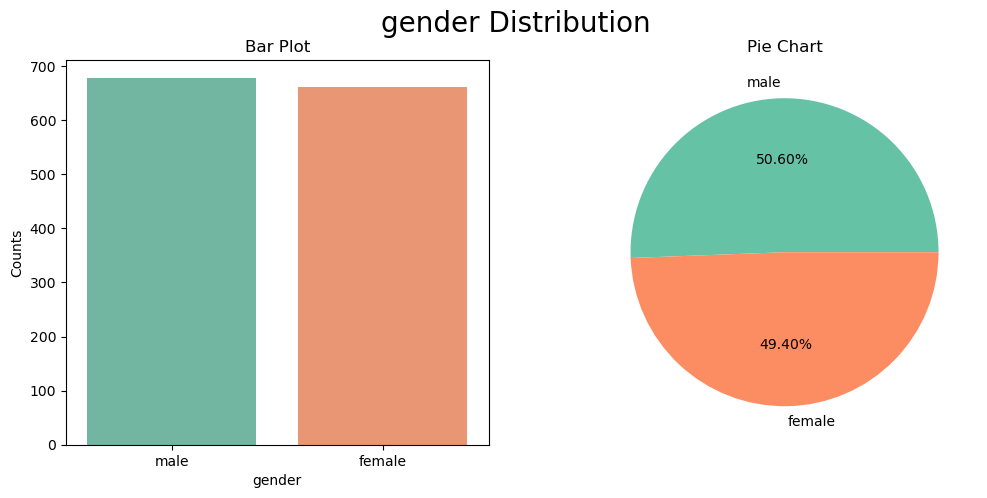

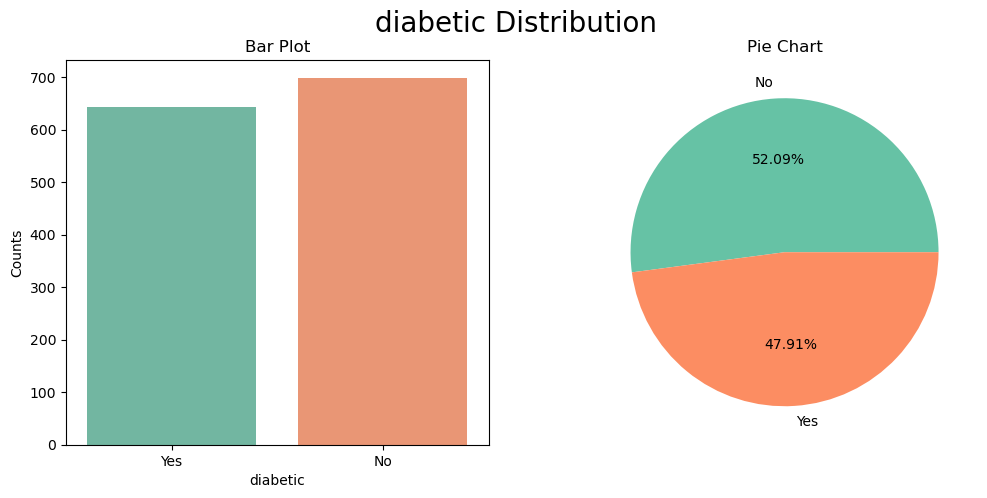

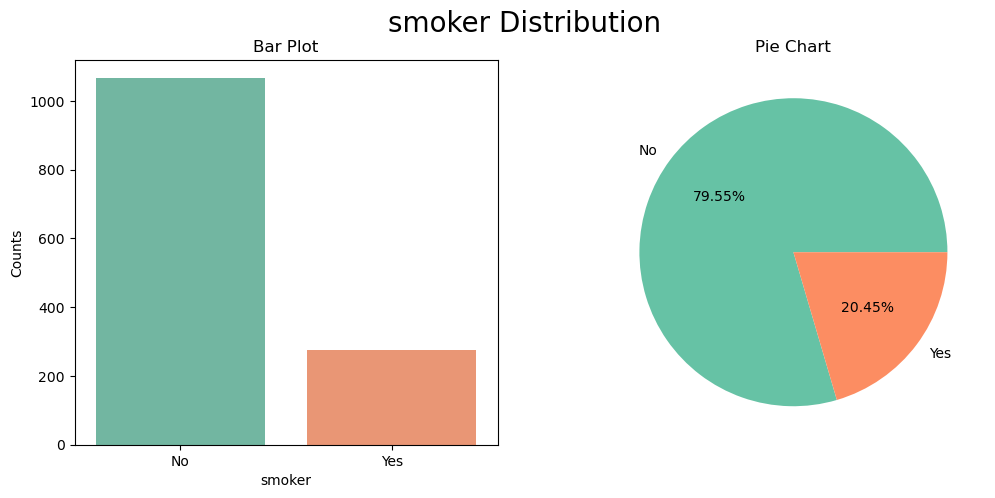

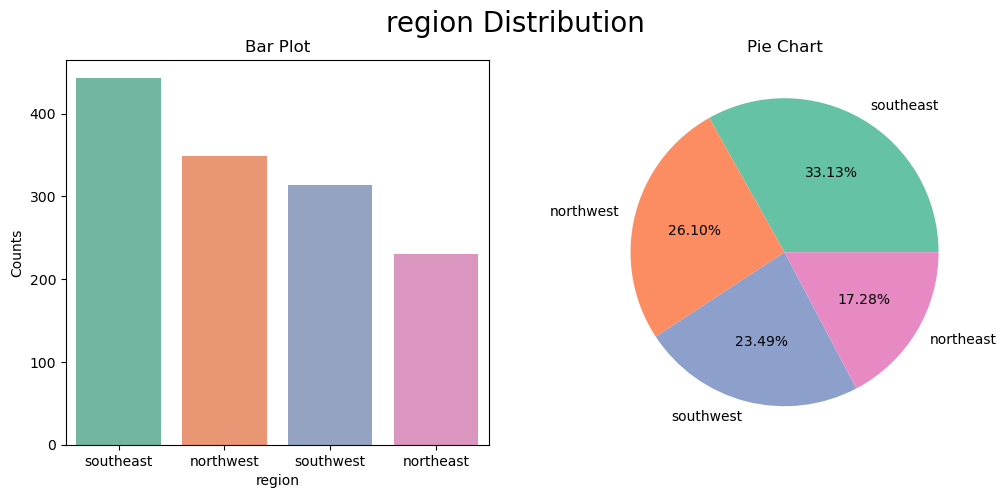

In [17]:
categorical_features = ['gender', 'diabetic', 'smoker', 'region']
palette = sns.color_palette("Set2")

for feature in categorical_features:
    pandas_df = data.select(feature).toPandas()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{feature} Distribution', fontsize=20)

    # This is the code for making Bar Plot
    sns.countplot(x=feature, data=pandas_df, palette=palette, ax=axes[0])
    axes[0].set_title('Bar Plot')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Counts')

    # This is the code for making Pie Chart
    pandas_df[feature].value_counts().plot(kind='pie', autopct="%.2f%%", colors=palette, ax=axes[1])
    axes[1].set_title('Pie Chart')
    axes[1].set_ylabel('')

    plt.show()

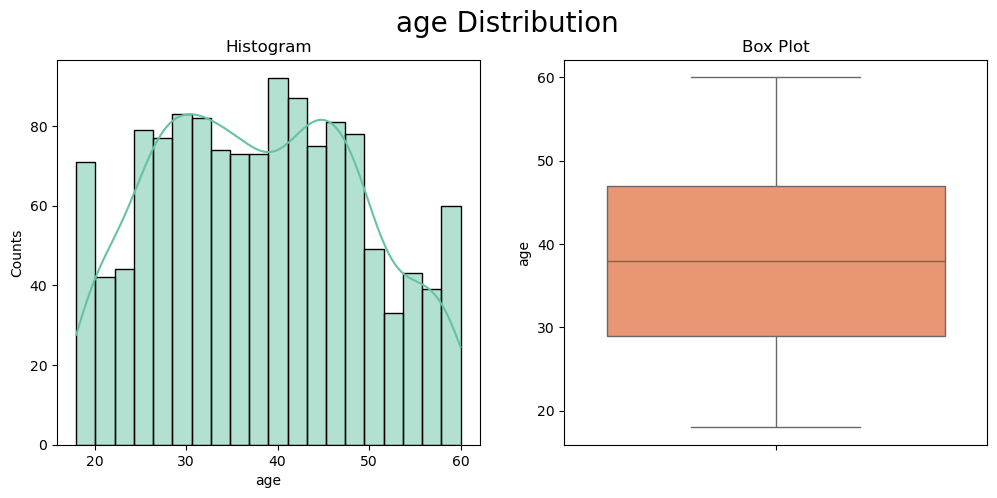

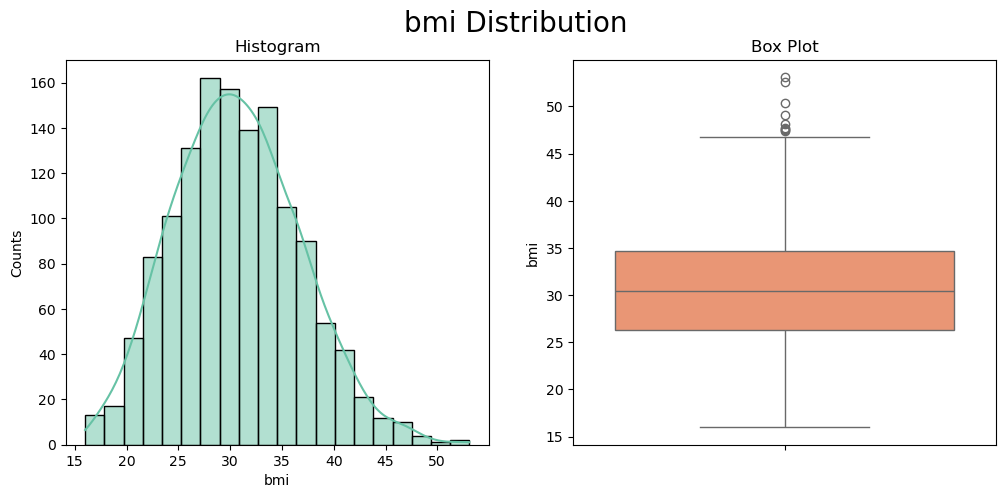

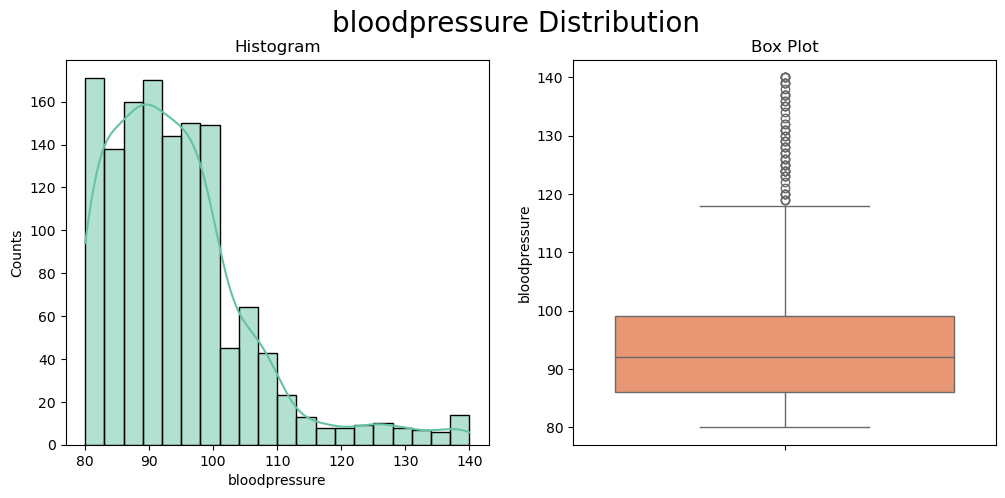

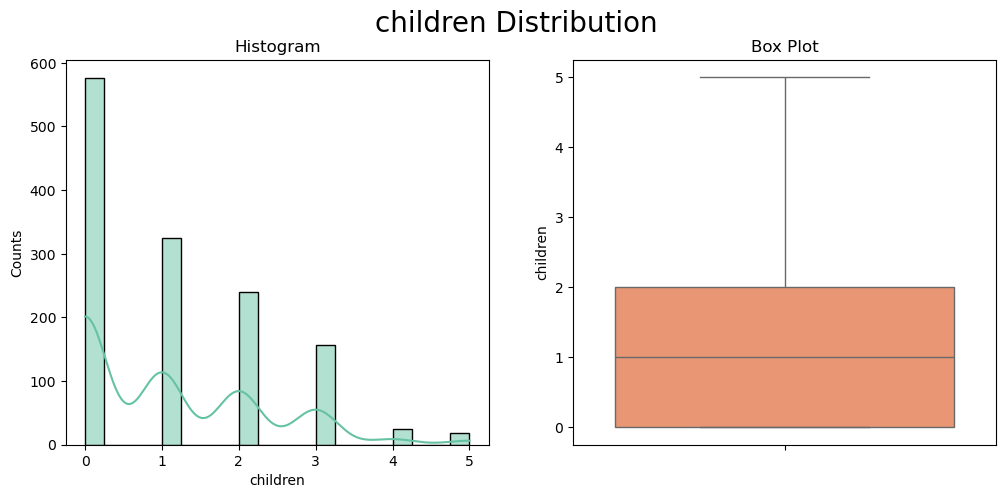

In [18]:
numerical_features = ['age', 'bmi', 'bloodpressure', 'children']
palette = sns.color_palette("Set2")

for feature in numerical_features:
    pandas_df = data.select(feature).toPandas()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{feature} Distribution', fontsize=20)

    # This is the code for making Histogram
    sns.histplot(pandas_df[feature], bins=20, color=palette[0], kde=True, ax=axes[0])
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Counts')

    # This is the code for making Box Plot
    sns.boxplot(y=pandas_df[feature], color=palette[1], ax=axes[1])
    axes[1].set_title('Box Plot')

    plt.show()

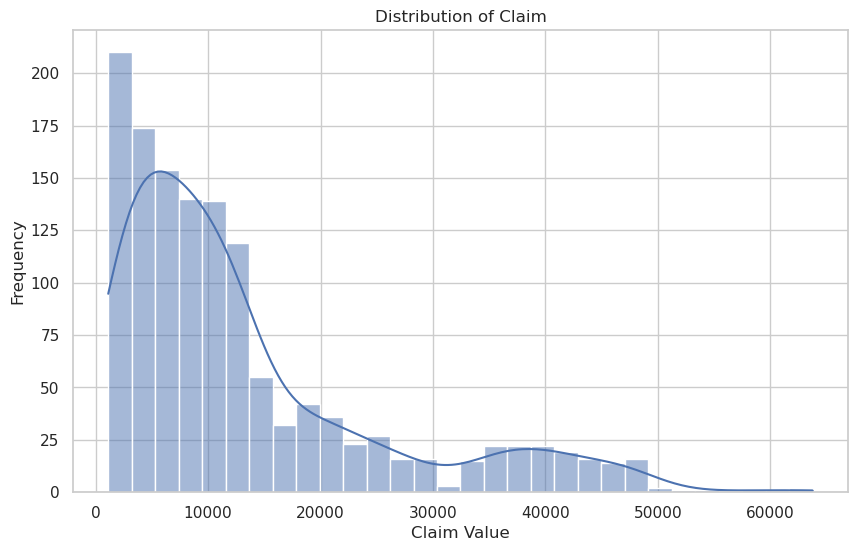

In [19]:
claim_data = data.select("claim").toPandas()
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(claim_data['claim'], kde=True)
plt.title('Distribution of Claim')
plt.xlabel('Claim Value')
plt.ylabel('Frequency')
plt.show()


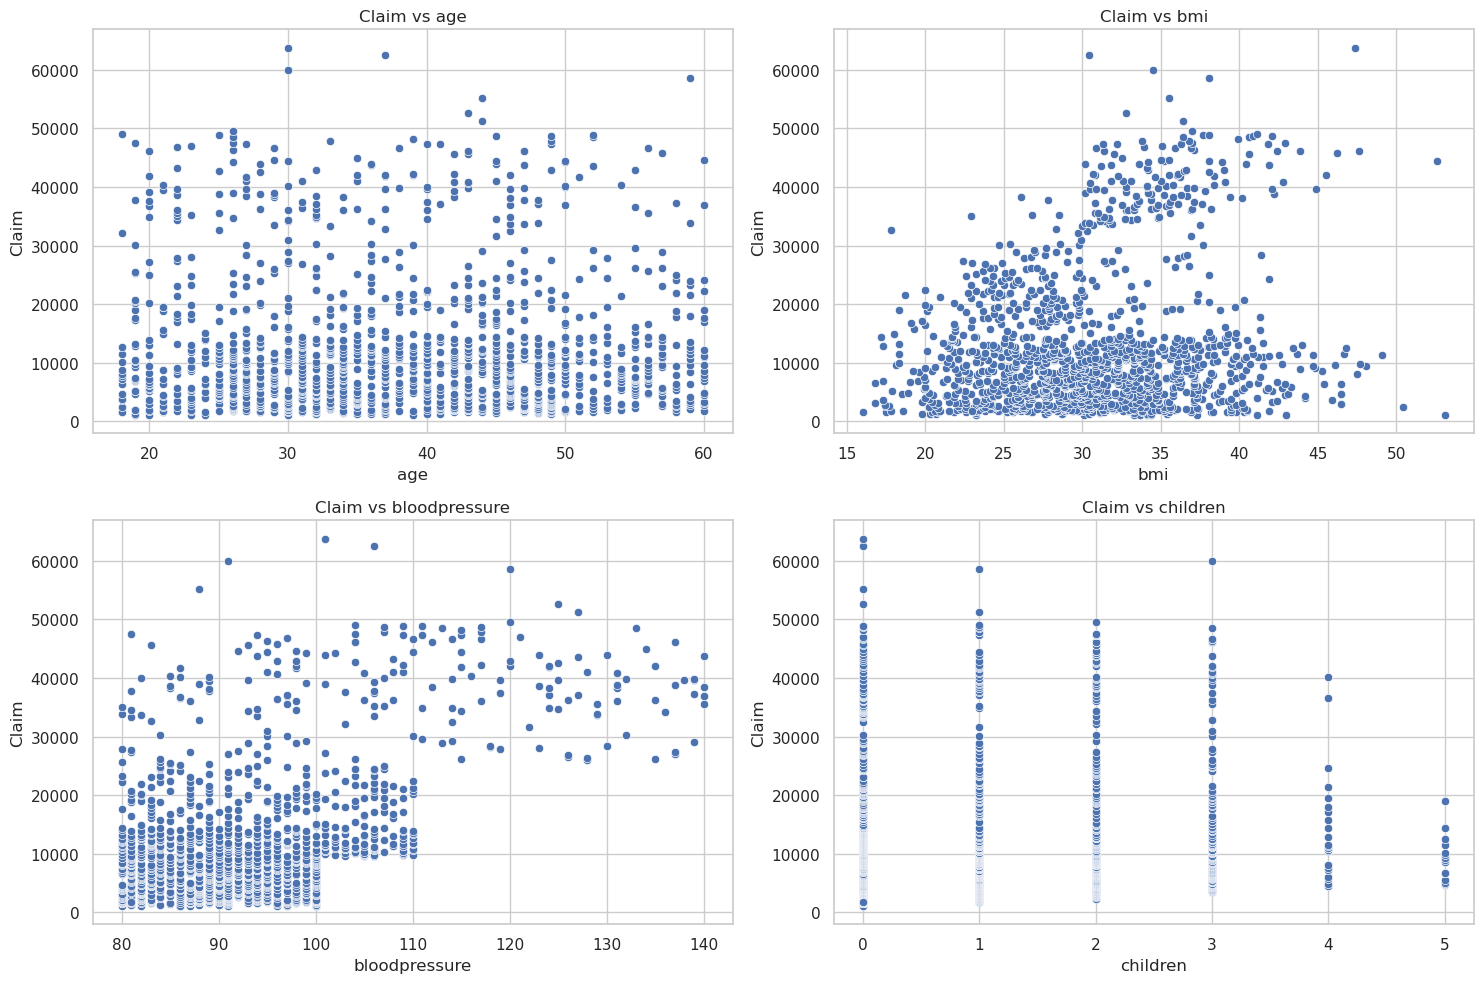

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):

    pandas_df = data.select(feature, 'claim').toPandas()
    plt.subplot(2, 2, i)
    sns.scatterplot(x=pandas_df[feature], y=pandas_df['claim'])
    plt.title(f'Claim vs {feature}')
    plt.ylabel('Claim')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

- **Age vs Claim:** There doesn't appear to be a clear linear relationship, but it seems that higher claims are more frequent in older age groups.
- **BMI vs Claim:** Again, no clear linear relationship is visible. However, there are some higher claims scattered across various BMI values.
- **Blood Pressure vs Claim:** The plot doesn't suggest a strong correlation between blood pressure and claim amounts.
- **Children vs Claim:** The number of children doesn't show a clear trend with the claim amounts..

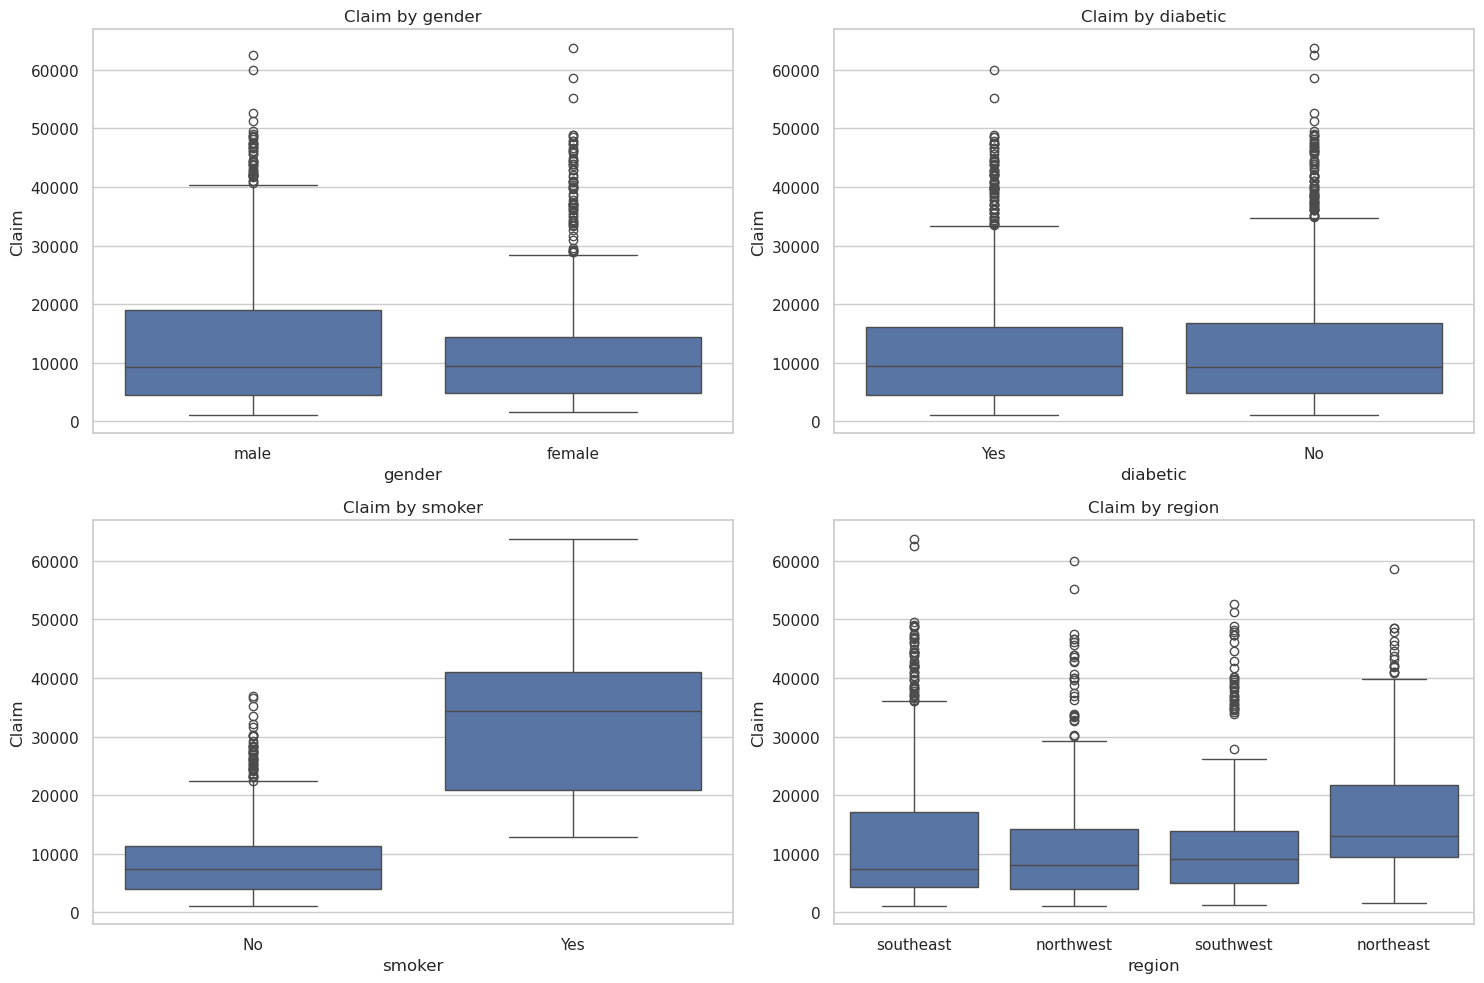

In [21]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    # This below is to convert to Pandas DataFrame
    pandas_df = data.select(feature, 'claim').toPandas()

    plt.subplot(2, 2, i)
    sns.boxplot(x=pandas_df[feature], y=pandas_df['claim'])
    plt.title(f'Claim by {feature}')
    plt.ylabel('Claim')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

- **Gender vs Claim:** The claim amounts appear similar across different genders, indicating gender may not be a strong predictor of claim amounts.
- **Diabetic vs Claim:** Diabetic patients seem to have slightly higher claim amounts than non-diabetic patients, though the difference is not substantial.
- **Smoker vs Claim:** There is a noticeable difference in claim amounts between smokers and non-smokers, with smokers having higher claim values. This suggests that smoking status could be an important factor in predicting claim amounts.
- **Region vs Claim:** The claim amounts vary slightly across different regions, but there isn't a pronounced difference that stands out.

In [22]:
from pyspark.sql.functions import approxCountDistinct, countDistinct

"""
Note: approxCountDistinct and countDistinct can be used interchangeably. Only difference is the computation time. 

"approxCountDistinct" is useful for large datasets 
"countDistinct" for small and medium datasets.

"""

def cardinality_calculation(df, cut_off=1):
    cardinality = df.select(*[approxCountDistinct(c).alias(c) for c in df.columns])
    
    # This is to convert to pandas for efficient calculations
    final_cardinality_df = cardinality.toPandas().transpose()
    final_cardinality_df.reset_index(inplace=True) 
    final_cardinality_df.rename(columns={0:'Cardinality'}, inplace=True) 
    
    # This code below is to select variables with cardinality of 1
    vars_selected = final_cardinality_df['index'][final_cardinality_df['Cardinality'] <= cut_off] 
    
    return final_cardinality_df, vars_selected

cardinality_df, cardinality_vars_selected = cardinality_calculation(data)

In [23]:
cardinality_df

,index,Cardinality
0,index,1339
1,PatientID,1339
2,age,42
3,gender,2
4,bmi,282
5,bloodpressure,63
6,diabetic,2
7,children,6
8,smoker,2
9,region,4


In [24]:
cardinality_vars_selected

Series([], Name: index, dtype: object)

# Checking Missing Values

In [25]:
from pyspark.sql.functions import count, when, isnan, col

# The miss_percentage is set to 80% 
def missing_calculation(df, miss_percentage=0.80):
    
    # This is to check for both NaN and null values
    missing = df.select(*[count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
    length_df = df.count()
    
    # This is to convert to pandas for efficient calculations
    final_missing_df = missing.toPandas().transpose()
    final_missing_df.reset_index(inplace=True) 
    final_missing_df.rename(columns={0:'missing_count'}, inplace=True) 
    final_missing_df['missing_percentage'] = final_missing_df['missing_count']/length_df
    
    # This is to select variables with cardinality of 1
    vars_selected = final_missing_df['index'][final_missing_df['missing_percentage'] >= miss_percentage] 
    
    return final_missing_df, vars_selected

In [26]:
missing_df, missing_vars_selected = missing_calculation(data)

In [27]:
missing_df

,index,missing_count,missing_percentage
0,index,0,0.000000
1,PatientID,0,0.000000
2,age,5,0.003731
3,gender,0,0.000000
4,bmi,0,0.000000
5,bloodpressure,0,0.000000
6,diabetic,0,0.000000
7,children,0,0.000000
8,smoker,0,0.000000
9,region,3,0.002239


In [28]:
missing_vars_selected

Series([], Name: index, dtype: object)

# Outlier

In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

def calculate_outlier_percentage(df, numeric_columns):

    outlier_percentages = {}

    for column in numeric_columns:
        # This code below is to count IQR
        q1 = df.approxQuantile(column, [0.25], 0.01)[0]
        q3 = df.approxQuantile(column, [0.75], 0.01)[0]
        iqr = q3 - q1

        # To define lower and upper bound
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # To count the percentage of the outlier 
        total_rows = df.count()
        outlier_rows = df.filter((col(column) < lower_bound) | (col(column) > upper_bound)).count()
        percentage_outliers = (outlier_rows / total_rows) * 100

        outlier_percentages[column] = percentage_outliers

    return outlier_percentages



In [30]:
spark = SparkSession.builder.appName("OutlierPercentage").getOrCreate()

# This is the numeric columns
numeric_columns = ["age", "bmi", "bloodpressure", "children"]

# We use function to count the outlier percentage
outlier_percentages = calculate_outlier_percentage(data, numeric_columns)

# Show the outlier percentage for every numeric column 
for column, percentage in outlier_percentages.items():
    print(f"The outlier percentage for column {column}: {percentage:.2f}%")


The outlier percentage for column age: 0.00%
The outlier percentage for column bmi: 0.67%
The outlier percentage for column bloodpressure: 4.63%
The outlier percentage for column children: 0.00%


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

def create_boxplot(df, numeric_columns):

    # This code below is to convert Spark DataFrame to Pandas DataFrame
    pandas_df = df.select(*numeric_columns).toPandas()

    # Making boxplot
    plt.figure(figsize=(12, 8))
    pandas_df.boxplot(column=numeric_columns)
    plt.title("Boxplot untuk Kolom Numerik")
    plt.ylabel("Nilai")
    plt.show()



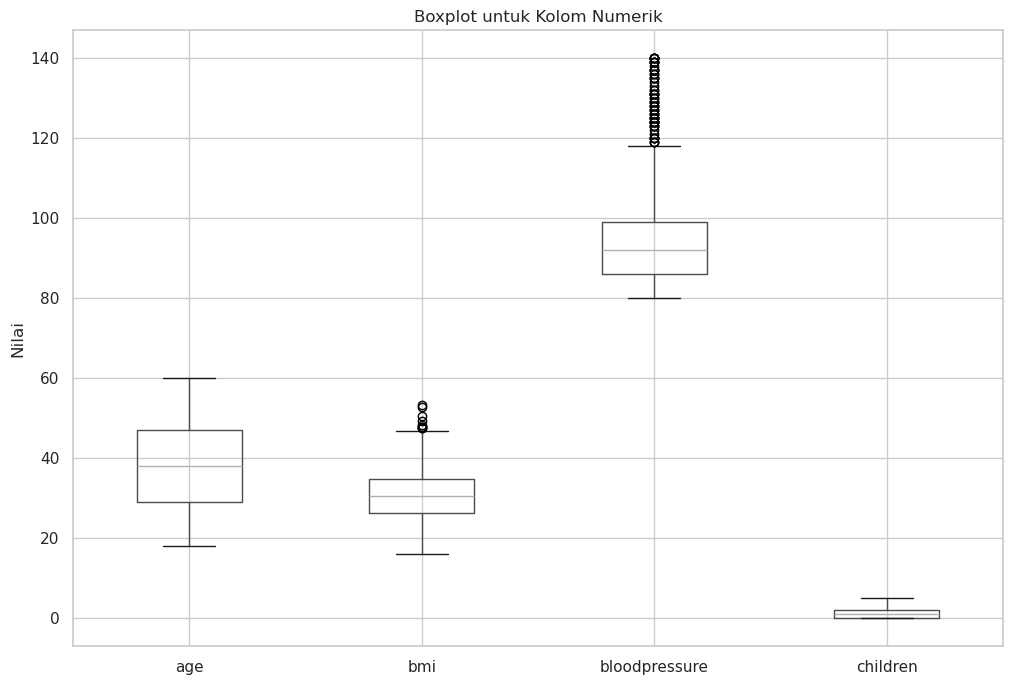

In [32]:
spark = SparkSession.builder.appName("Boxplot").getOrCreate()

# This below is the numeric columns
numeric_columns = ["age", "bmi", "bloodpressure", "children"]

# Making boxplot for numeric columns
create_boxplot(data, numeric_columns)


# Replacing Missing Values

In [33]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, when, col

def replace_missing_values(df, column_name):
  
    # Count the average for the column name
    mean_value = df.select(mean(df[column_name])).collect()[0][0]

    # Replace the missing value with mean
    df_imputed = df.withColumn(column_name, when(df[column_name].isNull(), mean_value).otherwise(df[column_name]))

    return df_imputed


In [34]:
spark = SparkSession.builder.appName("ImputeMissingValues").getOrCreate()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ExampleAppName").getOrCreate()


# Replace the missing value in "age" with the mean value
data = replace_missing_values(data, "age")

# Show to DataFrame after imputation
data.show()


+-----+---------+-----------------+------+----+-------------+--------+--------+------+---------+-------+
|index|PatientID|              age|gender| bmi|bloodpressure|diabetic|children|smoker|   region|  claim|
+-----+---------+-----------------+------+----+-------------+--------+--------+------+---------+-------+
|    0|        1|             39.0|  male|23.2|           91|     Yes|       0|    No|southeast|1121.87|
|    1|        2|             24.0|  male|30.1|           87|      No|       0|    No|southeast|1131.51|
|    2|        3|38.07865168539326|  male|33.3|           82|     Yes|       0|    No|southeast|1135.94|
|    3|        4|38.07865168539326|  male|33.7|           80|      No|       0|    No|northwest| 1136.4|
|    4|        5|38.07865168539326|  male|34.1|          100|      No|       0|    No|northwest|1137.01|
|    5|        6|38.07865168539326|  male|34.4|           96|     Yes|       0|    No|northwest|1137.47|
|    6|        7|38.07865168539326|  male|37.3|        

In [35]:
missing_df, missing_vars_selected = missing_calculation(data)

In [36]:
missing_df

,index,missing_count,missing_percentage
0,index,0,0.000000
1,PatientID,0,0.000000
2,age,0,0.000000
3,gender,0,0.000000
4,bmi,0,0.000000
5,bloodpressure,0,0.000000
6,diabetic,0,0.000000
7,children,0,0.000000
8,smoker,0,0.000000
9,region,3,0.002239


In [37]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col

def replace_missing_values_with_mode(df, column_name):
  
    # Count the mode
    mode_value = df.groupBy(column_name).count().orderBy("count", ascending=False).first()[column_name]

    # Replace the missing value with mode
    df_imputed = df.withColumn(column_name, when(df[column_name].isNull(), mode_value).otherwise(df[column_name]))

    return df_imputed

In [38]:
# Replace missing value from column 'region' with mode
data = replace_missing_values_with_mode(data, "region")

# Show the DataFrame after imputation
data.show()

+-----+---------+-----------------+------+----+-------------+--------+--------+------+---------+-------+
|index|PatientID|              age|gender| bmi|bloodpressure|diabetic|children|smoker|   region|  claim|
+-----+---------+-----------------+------+----+-------------+--------+--------+------+---------+-------+
|    0|        1|             39.0|  male|23.2|           91|     Yes|       0|    No|southeast|1121.87|
|    1|        2|             24.0|  male|30.1|           87|      No|       0|    No|southeast|1131.51|
|    2|        3|38.07865168539326|  male|33.3|           82|     Yes|       0|    No|southeast|1135.94|
|    3|        4|38.07865168539326|  male|33.7|           80|      No|       0|    No|northwest| 1136.4|
|    4|        5|38.07865168539326|  male|34.1|          100|      No|       0|    No|northwest|1137.01|
|    5|        6|38.07865168539326|  male|34.4|           96|     Yes|       0|    No|northwest|1137.47|
|    6|        7|38.07865168539326|  male|37.3|        

In [39]:
missing_df, missing_vars_selected = missing_calculation(data)

In [40]:
missing_df

,index,missing_count,missing_percentage
0,index,0,0.0
1,PatientID,0,0.0
2,age,0,0.0
3,gender,0,0.0
4,bmi,0,0.0
5,bloodpressure,0,0.0
6,diabetic,0,0.0
7,children,0,0.0
8,smoker,0,0.0
9,region,0,0.0


### Feature Transformation

In [41]:
def variable_type(df):
    
    vars_list = df.dtypes
    char_vars = []
    num_vars = []
    for i in vars_list:
        if i[1] in ('string'):
            char_vars.append(i[0])
        else:
            num_vars.append(i[0])
    
    return char_vars, num_vars

In [42]:
char_vars, num_vars = variable_type(data)

In [43]:
char_vars

['gender', 'diabetic', 'smoker', 'region']

In [44]:
num_vars

['index', 'PatientID', 'age', 'bmi', 'bloodpressure', 'children', 'claim']

In [45]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

def category_to_index(df, char_vars):
    
    char_df = df.select(char_vars)
    indexers = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in char_df.columns]
    pipeline = Pipeline(stages=indexers)
    char_labels = pipeline.fit(char_df)
    df = char_labels.transform(df)
    return df, char_labels

In [46]:
data, char_labels = category_to_index(data, char_vars)

In [47]:
data.dtypes

[('index', 'int'),
 ('PatientID', 'int'),
 ('age', 'double'),
 ('gender', 'string'),
 ('bmi', 'double'),
 ('bloodpressure', 'int'),
 ('diabetic', 'string'),
 ('children', 'int'),
 ('smoker', 'string'),
 ('region', 'string'),
 ('claim', 'double'),
 ('gender_index', 'double'),
 ('diabetic_index', 'double'),
 ('smoker_index', 'double'),
 ('region_index', 'double')]

In [48]:
data.show(20)

+-----+---------+-----------------+------+----+-------------+--------+--------+------+---------+-------+------------+--------------+------------+------------+
|index|PatientID|              age|gender| bmi|bloodpressure|diabetic|children|smoker|   region|  claim|gender_index|diabetic_index|smoker_index|region_index|
+-----+---------+-----------------+------+----+-------------+--------+--------+------+---------+-------+------------+--------------+------------+------------+
|    0|        1|             39.0|  male|23.2|           91|     Yes|       0|    No|southeast|1121.87|         0.0|           1.0|         0.0|         0.0|
|    1|        2|             24.0|  male|30.1|           87|      No|       0|    No|southeast|1131.51|         0.0|           0.0|         0.0|         0.0|
|    2|        3|38.07865168539326|  male|33.3|           82|     Yes|       0|    No|southeast|1135.94|         0.0|           1.0|         0.0|         0.0|
|    3|        4|38.07865168539326|  male|33.7

In [49]:
data = data.select([c for c in data.columns if c not in char_vars])

In [50]:
def rename_columns(df, char_vars):
    mapping = dict(zip([i + '_index' for i in char_vars], char_vars))
    df = df.select([col(c).alias(mapping.get(c, c)) for c in df.columns])
    return df

In [51]:
data = rename_columns(data, char_vars)

In [52]:
data.dtypes

[('index', 'int'),
 ('PatientID', 'int'),
 ('age', 'double'),
 ('bmi', 'double'),
 ('bloodpressure', 'int'),
 ('children', 'int'),
 ('claim', 'double'),
 ('gender', 'double'),
 ('diabetic', 'double'),
 ('smoker', 'double'),
 ('region', 'double')]

In [53]:
data.show(5)

+-----+---------+-----------------+----+-------------+--------+-------+------+--------+------+------+
|index|PatientID|              age| bmi|bloodpressure|children|  claim|gender|diabetic|smoker|region|
+-----+---------+-----------------+----+-------------+--------+-------+------+--------+------+------+
|    0|        1|             39.0|23.2|           91|       0|1121.87|   0.0|     1.0|   0.0|   0.0|
|    1|        2|             24.0|30.1|           87|       0|1131.51|   0.0|     0.0|   0.0|   0.0|
|    2|        3|38.07865168539326|33.3|           82|       0|1135.94|   0.0|     1.0|   0.0|   0.0|
|    3|        4|38.07865168539326|33.7|           80|       0| 1136.4|   0.0|     0.0|   0.0|   1.0|
|    4|        5|38.07865168539326|34.1|          100|       0|1137.01|   0.0|     0.0|   0.0|   1.0|
+-----+---------+-----------------+----+-------------+--------+-------+------+--------+------+------+
only showing top 5 rows



In [54]:
data.groupBy('gender').count().show() 

+------+-----+
|gender|count|
+------+-----+
|   0.0|  678|
|   1.0|  662|
+------+-----+



In [55]:
data.groupBy('smoker').count().show() 

+------+-----+
|smoker|count|
+------+-----+
|   0.0| 1066|
|   1.0|  274|
+------+-----+



### Scaling using Robust Scaler because we have outliers in out dataset

In [56]:
from pyspark.sql.functions import col, percentile_approx
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

quantiles = data.stat.approxQuantile(["age", "bmi", "bloodpressure"], [0.25, 0.5, 0.75], 0.0)

if len(quantiles[0]) >= 3 and len(quantiles[1]) >= 3 and len(quantiles[2]) >= 3:
    age_median, bmi_median, bloodpressure_median = quantiles[0][1], quantiles[1][1], quantiles[2][1]
    age_iqr, bmi_iqr, bloodpressure_iqr = quantiles[0][2] - quantiles[0][0], quantiles[1][2] - quantiles[1][0], quantiles[2][2] - quantiles[2][0]
else:
    print("Not enough quantiles in the result.")
    age_median, bmi_median, bloodpressure_median, age_iqr, bmi_iqr, bloodpressure_iqr = 0.0, 0.0, 0.0, 1.0, 1.0, 1.0

def robust_scale(column, median, iqr):
    return (col(column) - median) / (iqr)

data = data.withColumn("scaled_age", robust_scale("age", age_median, age_iqr))
data = data.withColumn("scaled_bmi", robust_scale("bmi", bmi_median, bmi_iqr))
data = data.withColumn("scaled_bloodpressure", robust_scale("bloodpressure", bloodpressure_median, bloodpressure_iqr))

assembler = VectorAssembler(inputCols=["scaled_age", "scaled_bmi", "scaled_bloodpressure"], outputCol="scaled_features")
scaler = StandardScaler(inputCol="scaled_features", outputCol="final_scaled_features")

pipeline = Pipeline(stages=[assembler, scaler])
data = pipeline.fit(data).transform(data)

# Show the result
data.select("final_scaled_features").show()

+---------------------+
|final_scaled_features|
+---------------------+
| [0.09023499763489...|
| [-1.2632899668884...|
| [0.00709713464544...|
| [0.00709713464544...|
| [0.00709713464544...|
| [0.00709713464544...|
| [0.00709713464544...|
| [-1.7144649550629...|
| [-1.6242299574280...|
| [-0.7218799810791...|
| [-0.1804699952697...|
| [-0.0902349976348...|
| [-1.7144649550629...|
| [-0.5414099858093...|
| [0.18046999526978...|
| [-0.5414099858093...|
| [-0.2707049929046...|
| [0.27070499290467...|
| [0.99258497398379...|
| [0.90234997634890...|
+---------------------+
only showing top 20 rows



In [57]:
data.select('scaled_features', 'final_scaled_features').show()

+--------------------+---------------------+
|     scaled_features|final_scaled_features|
+--------------------+---------------------+
|[0.05555555555555...| [0.09023499763489...|
|[-0.7777777777777...| [-1.2632899668884...|
|[0.00436953807740...| [0.00709713464544...|
|[0.00436953807740...| [0.00709713464544...|
|[0.00436953807740...| [0.00709713464544...|
|[0.00436953807740...| [0.00709713464544...|
|[0.00436953807740...| [0.00709713464544...|
|[-1.0555555555555...| [-1.7144649550629...|
|[-1.0,1.482352941...| [-1.6242299574280...|
|[-0.4444444444444...| [-0.7218799810791...|
|[-0.1111111111111...| [-0.1804699952697...|
|[-0.0555555555555...| [-0.0902349976348...|
|[-1.0555555555555...| [-1.7144649550629...|
|[-0.3333333333333...| [-0.5414099858093...|
|[0.11111111111111...| [0.18046999526978...|
|[-0.3333333333333...| [-0.5414099858093...|
|[-0.1666666666666...| [-0.2707049929046...|
|[0.16666666666666...| [0.27070499290467...|
|[0.61111111111111...| [0.99258497398379...|
|[0.555555

In [58]:
data.show()

+-----+---------+-----------------+----+-------------+--------+-------+------+--------+------+------+--------------------+--------------------+--------------------+--------------------+---------------------+
|index|PatientID|              age| bmi|bloodpressure|children|  claim|gender|diabetic|smoker|region|          scaled_age|          scaled_bmi|scaled_bloodpressure|     scaled_features|final_scaled_features|
+-----+---------+-----------------+----+-------------+--------+-------+------+--------+------+------+--------------------+--------------------+--------------------+--------------------+---------------------+
|    0|        1|             39.0|23.2|           91|       0|1121.87|   0.0|     1.0|   0.0|   0.0| 0.05555555555555555| -0.8470588235294113|-0.07692307692307693|[0.05555555555555...| [0.09023499763489...|
|    1|        2|             24.0|30.1|           87|       0|1131.51|   0.0|     0.0|   0.0|   0.0| -0.7777777777777778|-0.03529411764705...|-0.38461538461538464|[-0.

# Linear Regression

In [59]:
linear_df = data.select(['scaled_age', 'scaled_bmi', 'scaled_bloodpressure', 'children', 'gender', 'diabetic', 'smoker', 'region', 'claim'])
target_variable_name = 'claim'

In [60]:
linear_df.show()

+--------------------+--------------------+--------------------+--------+------+--------+------+------+-------+
|          scaled_age|          scaled_bmi|scaled_bloodpressure|children|gender|diabetic|smoker|region|  claim|
+--------------------+--------------------+--------------------+--------+------+--------+------+------+-------+
| 0.05555555555555555| -0.8470588235294113|-0.07692307692307693|       0|   0.0|     1.0|   0.0|   0.0|1121.87|
| -0.7777777777777778|-0.03529411764705...|-0.38461538461538464|       0|   0.0|     0.0|   0.0|   0.0|1131.51|
|0.004369538077403392| 0.34117647058823497| -0.7692307692307693|       0|   0.0|     1.0|   0.0|   0.0|1135.94|
|0.004369538077403392|  0.3882352941176474| -0.9230769230769231|       0|   0.0|     0.0|   0.0|   1.0| 1136.4|
|0.004369538077403392|   0.435294117647059|  0.6153846153846154|       0|   0.0|     0.0|   0.0|   1.0|1137.01|
|0.004369538077403392|  0.4705882352941175|  0.3076923076923077|       0|   0.0|     1.0|   0.0|   1.0|1

# This 2 code below is to do a Vector Assembler to make the values of each columns into 1 column named 'features'

In [61]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

def assemble_vectors(df, features_list, target_variable_name):
    assembler = VectorAssembler(inputCols=features_list, outputCol='features')
    pipeline = Pipeline(stages=[assembler])
    
    # We exclude the target variable column
    selected_cols = [target_variable_name] + features_list
    
    # We fit and transform the data using the pipeline
    df_transformed = pipeline.fit(df).transform(df).select(selected_cols)
    
    return df_transformed

# We exclude the target variable and select all other feature vectors
features_list = linear_df.columns
features_list.remove(target_variable_name)

# We apply the function on your DataFrame
df = assemble_vectors(linear_df, features_list, target_variable_name)
df.show(5)


+-------+--------------------+--------------------+--------------------+--------+------+--------+------+------+
|  claim|          scaled_age|          scaled_bmi|scaled_bloodpressure|children|gender|diabetic|smoker|region|
+-------+--------------------+--------------------+--------------------+--------+------+--------+------+------+
|1121.87| 0.05555555555555555| -0.8470588235294113|-0.07692307692307693|       0|   0.0|     1.0|   0.0|   0.0|
|1131.51| -0.7777777777777778|-0.03529411764705...|-0.38461538461538464|       0|   0.0|     0.0|   0.0|   0.0|
|1135.94|0.004369538077403392| 0.34117647058823497| -0.7692307692307693|       0|   0.0|     1.0|   0.0|   0.0|
| 1136.4|0.004369538077403392|  0.3882352941176474| -0.9230769230769231|       0|   0.0|     0.0|   0.0|   1.0|
|1137.01|0.004369538077403392|   0.435294117647059|  0.6153846153846154|       0|   0.0|     0.0|   0.0|   1.0|
+-------+--------------------+--------------------+--------------------+--------+------+--------+------+

In [62]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, array, udf
from pyspark.ml.linalg import Vectors, VectorUDT

linear_df = data.select(['scaled_age', 'scaled_bmi', 'scaled_bloodpressure', 'children', 'gender', 'diabetic', 'smoker', 'region', 'claim'])

# We exclude the target variable and select all other feature vectors
features_list = linear_df.columns
features_list.remove(target_variable_name)

# We create a UDF to assemble the features into a dense vector
assemble_vector_udf = udf(lambda row: Vectors.dense(row), VectorUDT())

# We apply the UDF to create the 'features' column
df_transformed = linear_df.withColumn(
    'features',
    assemble_vector_udf(array(*features_list))
).select(['claim', 'features'] + features_list)

df_transformed.show(truncate=False)


+-------+------------------------------------------------------------------------------------+--------------------+---------------------+--------------------+--------+------+--------+------+------+
|claim  |features                                                                            |scaled_age          |scaled_bmi           |scaled_bloodpressure|children|gender|diabetic|smoker|region|
+-------+------------------------------------------------------------------------------------+--------------------+---------------------+--------------------+--------+------+--------+------+------+
|1121.87|[0.05555555555555555,-0.8470588235294113,-0.07692307692307693,0.0,0.0,1.0,0.0,0.0]  |0.05555555555555555 |-0.8470588235294113  |-0.07692307692307693|0       |0.0   |1.0     |0.0   |0.0   |
|1131.51|[-0.7777777777777778,-0.035294117647058476,-0.38461538461538464,0.0,0.0,0.0,0.0,0.0]|-0.7777777777777778 |-0.035294117647058476|-0.38461538461538464|0       |0.0   |0.0     |0.0   |0.0   |
|1135.94|[

# Train Test Split & Modelling Phase

In [63]:
# Model Validation using RandomSplit
trainSet, testSet = df_transformed.randomSplit([0.9,0.1], seed = 123)

In [64]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
# We Create linear Object
lm = LinearRegression(featuresCol = 'features', labelCol = 'claim')

# This is to make the model
linearModel = lm.fit(trainSet)

In [65]:
# We transform the testSet
testSet1 = linearModel.transform(testSet)
testSet1.show()

+-------+--------------------+--------------------+--------------------+--------------------+--------+------+--------+------+------+------------------+
|  claim|            features|          scaled_age|          scaled_bmi|scaled_bloodpressure|children|gender|diabetic|smoker|region|        prediction|
+-------+--------------------+--------------------+--------------------+--------------------+--------+------+--------+------+------+------------------+
|1135.94|[0.00436953807740...|0.004369538077403392| 0.34117647058823497| -0.7692307692307693|       0|   0.0|     1.0|   0.0|   0.0| 5102.877157584113|
|1141.45|[0.00436953807740...|0.004369538077403392|  0.8117647058823524|-0.46153846153846156|       0|   0.0|     1.0|   0.0|   1.0| 8280.120697748192|
|1242.26|[-0.0555555555555...|-0.05555555555555555| -1.1882352941176464|-0.15384615384615385|       0|   0.0|     1.0|   0.0|   1.0| 3345.895689799034|
|1532.47|[-1.1111111111111...| -1.1111111111111112|  0.5999999999999999|  0.615384615384

In [66]:
from pyspark.ml.evaluation import RegressionEvaluator
# Model Evaluation
labelCol = 'claim'
evaluator = RegressionEvaluator(labelCol=labelCol)

# R-squared
r2 = evaluator.evaluate(testSet1, {evaluator.metricName: 'r2'})
print("R-squared: %.2f" % r2)

# Mean Squared Error (MSE)
mse = evaluator.evaluate(testSet1, {evaluator.metricName: 'mse'})
print("Mean Squared Error (MSE): %.2f" % mse)

# Root Mean Squared Error (RMSE)
rmse = evaluator.evaluate(testSet1, {evaluator.metricName: 'rmse'})
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Mean Absolute Error (MAE)
mae = evaluator.evaluate(testSet1, {evaluator.metricName: 'mae'})
print("Mean Absolute Error (MAE): %.2f" % mae)

R-squared: 0.70
Mean Squared Error (MSE): 37251702.61
Root Mean Squared Error (RMSE): 6103.42
Mean Absolute Error (MAE): 4749.18


# Variable Selection

In [67]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors

selector = ChiSqSelector(numTopFeatures=6, featuresCol="features", outputCol="selectedFeatures", labelCol="claim")
chi_selector = selector.fit(df_transformed['scaled_age', 'scaled_bmi', 'scaled_bloodpressure', 'children', 'gender', 'diabetic', 'smoker', 'region', 'claim', 'features'])
selected_data = chi_selector.transform(df_transformed['scaled_age', 'scaled_bmi', 'scaled_bloodpressure', 'children', 'gender', 'diabetic', 'smoker', 'region', 'claim', 'features'])

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
print("Selected Indices: ", chi_selector.selectedFeatures)
selected_data.show()

ChiSqSelector output with top 6 features selected
Selected Indices:  [0, 1, 2, 3, 5, 7]
+--------------------+--------------------+--------------------+--------+------+--------+------+------+-------+--------------------+--------------------+
|          scaled_age|          scaled_bmi|scaled_bloodpressure|children|gender|diabetic|smoker|region|  claim|            features|    selectedFeatures|
+--------------------+--------------------+--------------------+--------+------+--------+------+------+-------+--------------------+--------------------+
| 0.05555555555555555| -0.8470588235294113|-0.07692307692307693|       0|   0.0|     1.0|   0.0|   0.0|1121.87|[0.05555555555555...|[0.05555555555555...|
| -0.7777777777777778|-0.03529411764705...|-0.38461538461538464|       0|   0.0|     0.0|   0.0|   0.0|1131.51|[-0.7777777777777...|[-0.7777777777777...|
|0.004369538077403392| 0.34117647058823497| -0.7692307692307693|       0|   0.0|     1.0|   0.0|   0.0|1135.94|[0.00436953807740...|[0.0043695

In [68]:
chi_selector.selectedFeatures

[0, 1, 2, 3, 5, 7]

Results from the variable selection : age, bmi, bloodpressure, children, gender, smoker

In [69]:
linear_df = data.select(['scaled_age', 'scaled_bmi', 'scaled_bloodpressure', 'children', 'gender', 'smoker', 'claim'])

features_list = linear_df.columns
features_list.remove(target_variable_name)

assemble_vector_udf = udf(lambda row: Vectors.dense(row), VectorUDT())

df_transformed = linear_df.withColumn(
    'features',
    assemble_vector_udf(array(*features_list))
).select(['claim', 'features'] + features_list)

df_transformed.show(truncate=False)

+-------+----------------------------------------------------------------------------+--------------------+---------------------+--------------------+--------+------+------+
|claim  |features                                                                    |scaled_age          |scaled_bmi           |scaled_bloodpressure|children|gender|smoker|
+-------+----------------------------------------------------------------------------+--------------------+---------------------+--------------------+--------+------+------+
|1121.87|[0.05555555555555555,-0.8470588235294113,-0.07692307692307693,0.0,0.0,0.0]  |0.05555555555555555 |-0.8470588235294113  |-0.07692307692307693|0       |0.0   |0.0   |
|1131.51|[-0.7777777777777778,-0.035294117647058476,-0.38461538461538464,0.0,0.0,0.0]|-0.7777777777777778 |-0.035294117647058476|-0.38461538461538464|0       |0.0   |0.0   |
|1135.94|[0.004369538077403392,0.34117647058823497,-0.7692307692307693,0.0,0.0,0.0]  |0.004369538077403392|0.34117647058823497  |-

# Split Train Test Data & Modelling After Variable Selection

In [70]:
# Model Validation using RandomSplit
trainSet, testSet = df_transformed.randomSplit([0.9,0.1], seed = 123)

In [71]:
# This it the Model Building
# We Create linear Object
lm = LinearRegression(featuresCol = 'features', labelCol = 'claim')

# We make the model
linearModel = lm.fit(trainSet)

In [72]:
# We transform the testSet
testSet1 = linearModel.transform(testSet)
testSet1.show()

+-------+--------------------+--------------------+--------------------+--------------------+--------+------+------+------------------+
|  claim|            features|          scaled_age|          scaled_bmi|scaled_bloodpressure|children|gender|smoker|        prediction|
+-------+--------------------+--------------------+--------------------+--------------------+--------+------+------+------------------+
|1135.94|[0.00436953807740...|0.004369538077403392| 0.34117647058823497| -0.7692307692307693|       0|   0.0|   0.0| 6126.711829451416|
|1141.45|[0.00436953807740...|0.004369538077403392|  0.8117647058823524|-0.46153846153846156|       0|   0.0|   0.0| 8389.290126444963|
|1242.26|[-0.0555555555555...|-0.05555555555555555| -1.1882352941176464|-0.15384615384615385|       0|   0.0|   0.0| 3861.228848097728|
|1532.47|[-1.1111111111111...| -1.1111111111111112|  0.5999999999999999|  0.6153846153846154|       0|   0.0|   0.0|10860.518825800564|
|1622.19|[-0.1666666666666...|-0.166666666666666

In [73]:
from pyspark.ml.evaluation import RegressionEvaluator
# Model Evaluation
labelCol = 'claim' 
evaluator = RegressionEvaluator(labelCol=labelCol)

# R-squared
r2 = evaluator.evaluate(testSet1, {evaluator.metricName: 'r2'})
print("R-squared: %.2f" % r2)

# Mean Squared Error (MSE)
mse = evaluator.evaluate(testSet1, {evaluator.metricName: 'mse'})
print("Mean Squared Error (MSE): %.2f" % mse)

# Root Mean Squared Error (RMSE)
rmse = evaluator.evaluate(testSet1, {evaluator.metricName: 'rmse'})
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Mean Absolute Error (MAE)
mae = evaluator.evaluate(testSet1, {evaluator.metricName: 'mae'})
print("Mean Absolute Error (MAE): %.2f" % mae)

R-squared: 0.70
Mean Squared Error (MSE): 37090924.15
Root Mean Squared Error (RMSE): 6090.23
Mean Absolute Error (MAE): 4754.04


In comparing the performance of the first linear regression model without variable selection to the second model with variable selection, both models creates a similar R-squared value of 0.70, indicating a consistent ability to explain 70% of the variability in the dependent variable. However, the second model showcases a slight improvement, with slightly lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values. The MSE decreased from 37,251,702.61 to 37,090,924.15, and the RMSE decreased from 6,103.42 to 6,090.23. On the other hand, the Mean Absolute Error (MAE) increased slightly from 4,749.18 to 4,754.04 in the second model. While these improvements are modest, they suggest a slightly enhanced predictive accuracy with variable selection.

## Thankyou